In [21]:
import re
import os
from os import path

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from lab_tools import graph, lab_round

%matplotlib widget

width = 469.75502 # To get the page width insert "\the\textwidth" in your LaTeX document
here_path = path.abspath('') # path.dirname(__file__)
graph_path = path.join(here_path, "../images/")
data_path = path.join(here_path, "../data/")

mpl.rcParams.update({
    # Show minor ticks
    "ytick.minor.visible": True,
    "xtick.minor.visible": True,
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    # High resolution .png
    "savefig.dpi": 600,
    "savefig.bbox": "tight",
    # Default image size
    "figure.figsize": graph.size(width),
})

In [22]:
wave_length = 650 / 10**9

slits = [0.02, 0.04, 0.08]
sensors = [0.5, 1.0, 1.5]

slit_name = 0.04
slit = slit_name / 10**3
slit_pos = 4 / 10**2

sensor_name = 1.5
sensor = sensor_name / 10**3
sensor_pos = 102.5 / 10**2

distance = sensor_pos - slit_pos

In [23]:
files_15 = [
    file
    for file in os.listdir(path.join(data_path, "raw"))
    if re.search(f"\\w+ {slit_name:.2f} {1.5:.1f}.tsv", file)
]

dfs_15 = [
    pd.read_csv(
        path.join(data_path, "raw", file),
        sep='\t',
        engine='python',
    )
    for file in files_15
]

files_10 = [
    file
    for file in os.listdir(path.join(data_path, "raw"))
    if re.search(f"\\w+ {slit_name:.2f} {1.0:.1f}", file)
]

dfs_10 = [
    pd.read_csv(
        path.join(data_path, "raw", file),
        sep='\t',
        engine='python',
    )
    for file in files_10
]

files_05 = [
    file
    for file in os.listdir(path.join(data_path, "raw"))
    if re.search(f"\\w+ {slit_name:.2f} {0.5:.1f}.tsv", file)
]

dfs_05 = [
    pd.read_csv(
        path.join(data_path, "raw", file),
        sep='\t',
        engine='python',
    )
    for file in files_05
]


for df in dfs_15 + dfs_10 + dfs_05:
    df.y -= df.y.min()
    df['dI'] = 0.1 * df.I
    # df.I -= df.I.min()


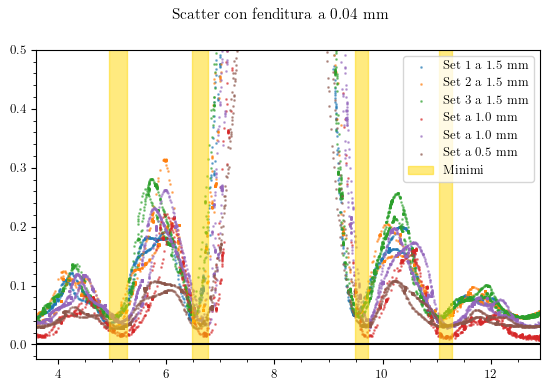

In [24]:
fig, ax = plt.subplots(1, 1)
fig.suptitle(f"Scatter con fenditura a {slit_name} mm", fontsize=11)

for i, df in enumerate(dfs_15):
    ax.scatter(df.y, df.I, s=1, alpha = 0.5, label=f"Set {i+1} a 1.5 mm")
for df in dfs_10:
    ax.scatter(df.y, df.I, s=1, alpha = 0.5, label=f"Set a 1.0 mm")
for df in dfs_05:
    ax.scatter(df.y, df.I, s=1, alpha = 0.5, label=f"Set a 0.5 mm")


xlim = ax.get_xlim()
ax.plot(xlim, [0, 0], c="black")

ylim = ax.get_ylim()
ax.fill_betweenx(ylim, [4.94]*2, [5.27]*2, alpha = 0.5, color="gold", label="Minimi")
ax.fill_betweenx(ylim, [6.47]*2, [6.77]*2, alpha = 0.5, color="gold")
ax.fill_betweenx(ylim, [9.49]*2, [9.73]*2, alpha = 0.5, color="gold")
ax.fill_betweenx(ylim, [11.04]*2, [11.27]*2, alpha = 0.5, color="gold")

ax.legend()
ax.set_xlim(3.6, 12.9)
ax.set_ylim(-0.025, 0.5)

fig.savefig(path.join(graph_path, f"min_{slit_name}.png"))

Valori dei minimi sono

- 5.11 +/- 0.17
- 6.62 +/- 0.15
- 9.61 +/- 0.12
- 11.17 +/- 0.13

Le distanze sono

- 1.51 +/- 0.32
- Ignoro 2.99 / 2 = 1.50 +/- 0.14
- 1.56 +/- 0.25

$\frac{\lambda L}{a} = (1.54 \pm 0.29) cm$

In [25]:
wave_length * distance / 1.54 * 10**5

0.04157467532467532

0.042 +/- 0.008